# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
app_train['AMT_INCOME_TOTAL'].mean()

168797.9192969845

In [9]:
app_train['AMT_INCOME_TOTAL'].std()

237123.14627885626

In [11]:
app_train['AMT_INCOME_TOTAL'].var()

56227386501.18386

<function matplotlib.pyplot.show(close=None, block=None)>

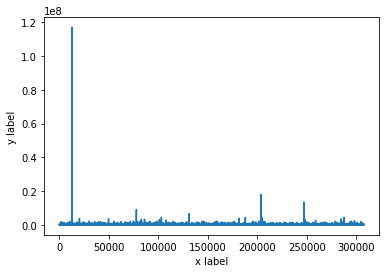

In [16]:
plt.plot(app_train['AMT_INCOME_TOTAL'])
plt.xlabel('x label')
plt.ylabel('y label')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

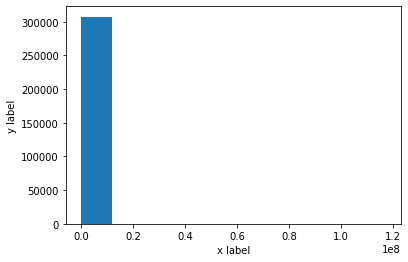

In [19]:
plt.hist(app_train['AMT_INCOME_TOTAL'])
plt.xlabel('x label')
plt.ylabel('y label')
plt.show

In [21]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [22]:
app_train['AMT_INCOME_TOTAL'].shape

(307511,)

In [24]:
app_train['AMT_INCOME_TOTAL'].quantile(0.99)

472500.0

In [25]:
app_train['AMT_INCOME_TOTAL'] < app_train['AMT_INCOME_TOTAL'].quantile(0.99)

0         True
1         True
2         True
3         True
4         True
          ... 
307506    True
307507    True
307508    True
307509    True
307510    True
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: bool

In [28]:
app_train[app_train['AMT_INCOME_TOTAL'] < app_train['AMT_INCOME_TOTAL'].quantile(0.99)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>],
       [<AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'FLA

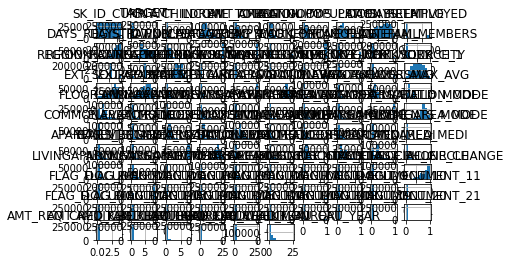

In [34]:
app_train.loc[app_train['AMT_INCOME_TOTAL'] < app_train['AMT_INCOME_TOTAL'].quantile(0.99)].hist()

In [36]:
app_train.loc[app_train['AMT_INCOME_TOTAL'] < app_train['AMT_INCOME_TOTAL'].quantile(0.99)]['AMT_INCOME_TOTAL']


0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 304417, dtype: float64

<AxesSubplot:>

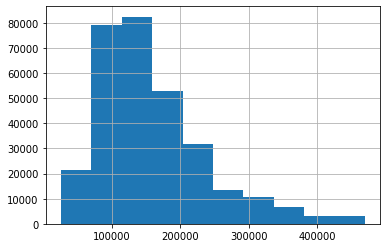

In [37]:
app_train.loc[app_train['AMT_INCOME_TOTAL'] < app_train['AMT_INCOME_TOTAL'].quantile(0.99)]['AMT_INCOME_TOTAL'].hist()
